Import libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [20]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df.drop(columns=["Cumulative_deaths"])
df = df.groupby(date_column).sum().reset_index()
date = df[date_column].values
df.set_index(date_column, inplace=True)
df = df.select_dtypes(exclude=["object"])

Train test split

In [21]:
train = df.iloc[:-30]
test = df.iloc[-30:]

Create the model

In [22]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

pred = model.predict(test.drop(columns=[target_column]))

Plot the result

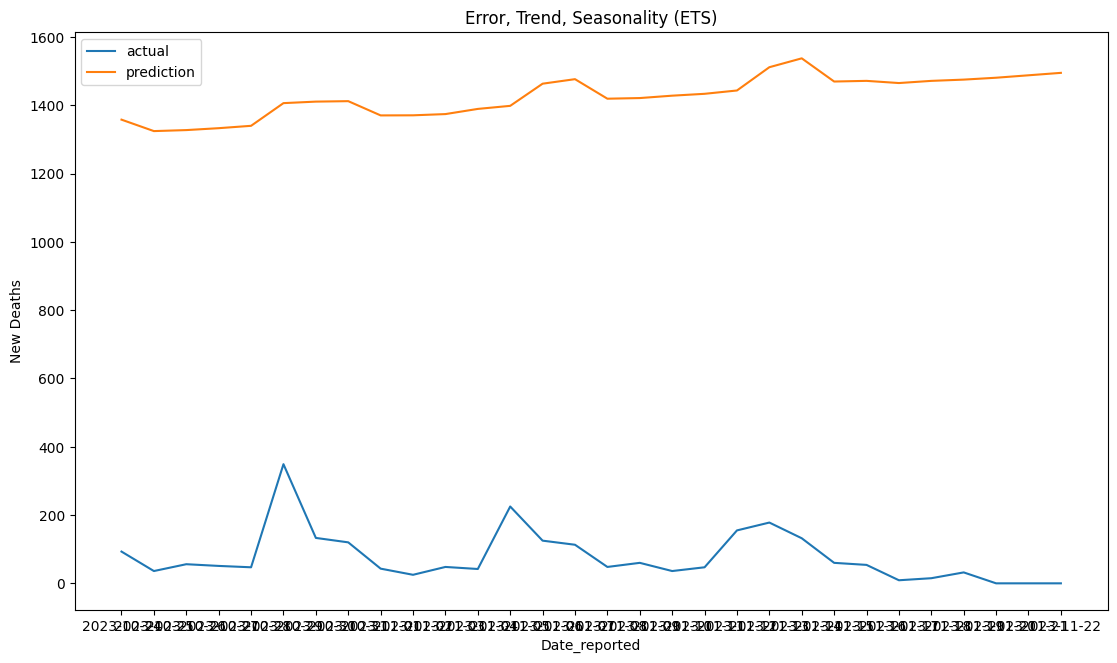

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(date[-30:], test[target_column].values, label="actual")
ax.plot(date[-30:], pred, label="prediction")
ax.set_title("Error, Trend, Seasonality (ETS)")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
plt.show()

RMSE of the result

In [24]:
print_evaluation_metrics(pred, test[target_column])

Evaluation Metrics:
MSE: 1825548.36
RMSE: 1351.13
MAE: 1347.93
MAPE: inf
SMAPE: 180.16
